In [1]:
from scipy.signal import windows
import matplotlib.pyplot as plt
import scipy.signal as signal
import numpy as np
import pds

wp = .25*np.pi
ws = .35*np.pi
wc = (wp+ws)/2

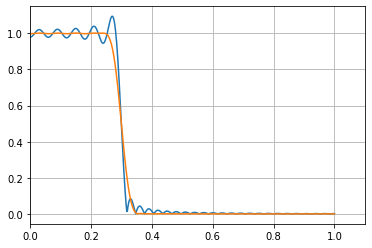

In [2]:
# Janela fixa
M = 66
m = np.arange(M+1)
hd = pds.sinc(m-M/2, wc)
h = hd * windows.hamming(M+1)

Hd, w = pds.dtft(hd, m)
H, w = pds.dtft(h, m)

plt.plot(w/np.pi, np.abs(Hd), w/np.pi, np.abs(H))
plt.xlim(left=0)
plt.grid()

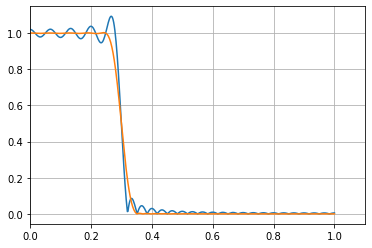

In [3]:
# Janela ajustavel

M = 60
beta = 4.528
m = np.arange(M+1)
hd = pds.sinc(m-M/2, wc)
h = hd * windows.kaiser(M+1, beta)

Hd, w = pds.dtft(hd, m)
H, w = pds.dtft(h, m)

plt.plot(w/np.pi, np.abs(Hd), w/np.pi, np.abs(H))
plt.xlim(left=0)
plt.grid()

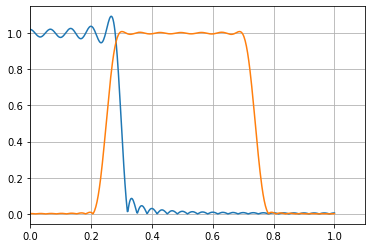

In [4]:
# Multifaixa com janela ajustavel

A = 40
Dw = .08
L, beta = signal.kaiserord(A, Dw)
L += (L-1) % 2
M = L - 1
m  = np.arange(L)
hd = pds.sinc(m-M/2, .25 * np.pi) - pds.sinc(m-M/2, .74 * np.pi)
h = hd * windows.kaiser(L, beta)
H, w = pds.dtft(h, m)

plt.plot(w/np.pi, np.abs(Hd), w/np.pi, np.abs(H))
plt.xlim(left=0)
plt.grid()

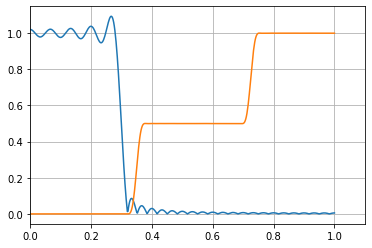

In [5]:
# Manolakis 2010 Capitulo 10 Ex 17

A = 60
Dw = .05
L, beta = signal.kaiserord(A, Dw)
L += (L-1) % 2
M = L - 1
m  = np.arange(L)
hd = 0.5 * (pds.sinc(m-M/2, .35*np.pi) - pds.sinc(m-M/2, .725*np.pi)) + (pds.sinc(m-M/2, .725*np.pi) - pds.sinc(m-M/2, np.pi)) 
h = hd * windows.kaiser(L, beta)
H, w = pds.dtft(h, m)

plt.plot(w/np.pi, np.abs(Hd), w/np.pi, np.abs(H))
plt.xlim(left=0)
plt.grid()